# Hello
This notebook will depict answers to some question such as,
1. How to make data tell stories?
2. What kind of interpretation can be concluded from each plots?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

In [2]:
#reading data
data = pd.read_csv('/kaggle/input/iris/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Missing Values in Train dataset')

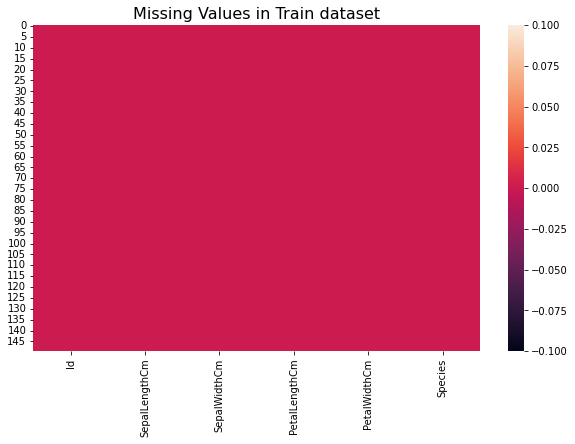

In [3]:
#missing values in train dataset
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull())
plt.title('Missing Values in Train dataset', size=16)


In [4]:
#dropping 'Id' as it is irrelevant for EDA
data = data.drop(['Id'], axis=1)

# Histogram
---
To analyse and understand the distribution of the sample. It might be normal distributiion, left skewed, right skewed, uniform or any other. Understanding the distribution can help in dealing with missing values such as,
1. If left-skewed or right-skewed, then use median as median is not affected by extreme values
2. If normal distribution, then use mean

For comparing two distributions, make sure to have same values on x and y axis and same size of bins. Size of bins can affect the shape of distribution. Histogram helps to understand whether the distribution is unimodal, bimodal or multimodal. Also, it tells about how widely the distribution is spread. It also helps to identify outliers in the dataset.

There can be many ways to choose size of bins but one of them is sturge's rule.
K = 1 + 3.22 logN

where, 
K is number of bins

N is number of observations






In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

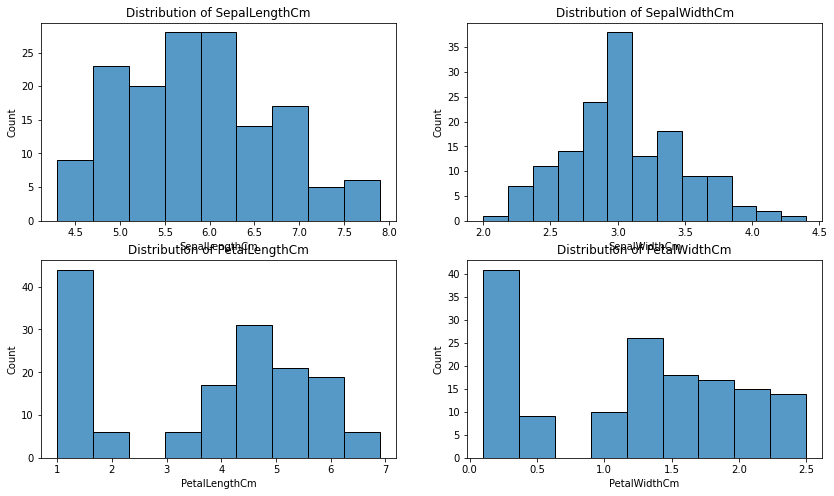

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for x, ax in zip(data.iloc[:, :4], axes.flatten()):
    sns.histplot(data[x], ax=ax)
    ax.set_title('Distribution of {}'.format(x))

# Scatter plots
---
Scatter plot helps to understand the nature of relationship between two continuous variable. It can be,

1. Linear
* Positive: Uphill from left to right
* Negative: Downhill from left to right
2. Non-linear: Curvy pattern
3. No pattern: No correlation

Scatterplots with a linear pattern have points that seem to generally fall along a line while nonlinear patterns seem to follow along some curve. Whatever the pattern is, we use this to describe the association between the variables. If there is no clear pattern, then it means there is no clear association or relationship between the variables that we are studying. In case of perfectly linear plots, we can get relationship like X increases makes z times Y.

Closer points ->>> Better correlation

Correlation does not imply causation. If relationship exists, It does not necessarily mean that increase/decrease in x causes increase/decrease in y. In case any feature is scatter plotted against target variable, and it has high correlation (positive/negative), then it means that it can explain the target variable very well and is good feature to predict the target variable.

It helps to understand about:
1. Outliers: A point which is distant from other points but in the path of regression line. It does not fit in the regression line and may influence the line by a large margin.

2. High-leverage observation: away from regression line/points pattern. It changes the regression line but not by a large margin.

Issues in scatter plot is that human eye fails to understand overlapping points.

Text(0.5, 1.0, 'Pairplot of Continuous variables')

<Figure size 864x432 with 0 Axes>

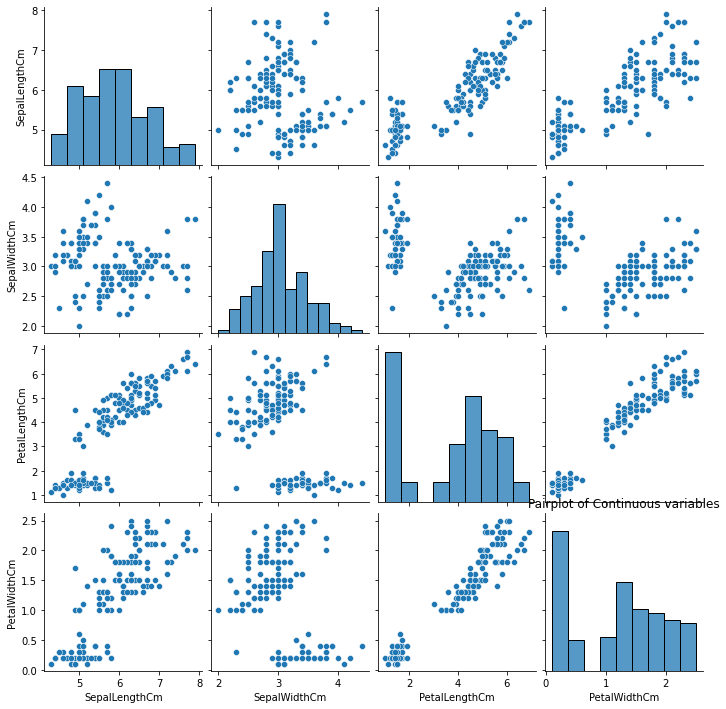

In [7]:
#pair plot
plt.figure(figsize=(12, 6))
sns.pairplot(data=data)
plt.title('Pairplot of Continuous variables')

* The above plot is the pair plot of all the probable combination of the features. The diagonal holds the histogram of each feature.
* Out of all, the relationship of petal length and petal width is most linear which means that they hold strong relationship.
* As the data points fall as uphill from left to right, they hold a positive relationship. In fact, most of them hold positive relationship.
* Petal length and sepal length is also one of the most linear plots with positive relationship.
* Roughly, there are no major outliers in the plot but may be there are some high-leverage points.
* In all the scatter plots, a segment of points is separated from majority of data points. To dig deeper, I will plot the pair plot with target variable "Species" as third variable.

Text(0.5, 1.0, 'Pairplot with Hue')

<Figure size 864x432 with 0 Axes>

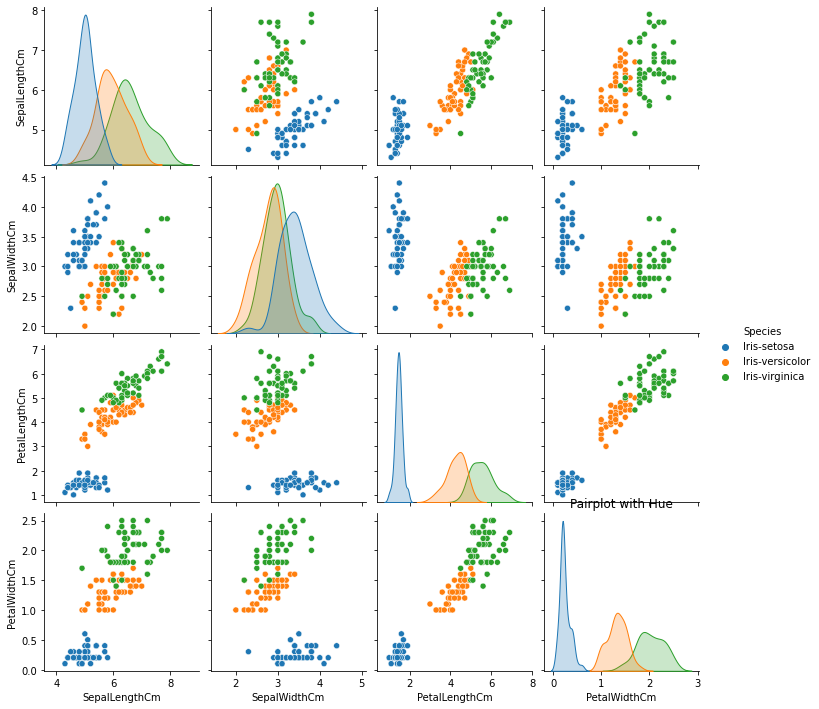

In [8]:
#pair plot with hue
plt.figure(figsize=(12, 6))
sns.pairplot(data=data, hue='Species')
plt.title('Pairplot with Hue')

* As seen in above scatter plots, the 'Iris-setosa' is the group which is separated from other two especially in terms of petal length and petal width.
* The histogram of petal length and petal width says that the length and width of 'Iris Setosa' is less as compared to other two classes.
* Therefore, petal length and petal width are important features to classify setosa from other two classes.

# Heatmaps
---

Scatter plot can just make you understand the nature of relationship between two continuous variables. But, to understand the strength of their relationship, we need to plot the heatmap which depicts the correlation coefficient.

Correlation coefficient is to check the strength of relationship between two variables. If high correlation, it does not mean that one variable increase causes change in other variable as correlation does not imply causation. It might be due to third variable as well which is unknown.

Positive Correlation: increase together so the scatter plot is uphill from left to right
Negative Correlation : one increase, second decrease so scatter plot is downhill from left to right
Near zero: no correlation

Good correlation of a predictor with target variable means that dependent variable can be explained well by predictor and predictor is considered as important feature for modelling.

Multi collinearity is an issue where there is highcorrelation between predictors/independent features. It is a issue because all predicts must be independent. It is bottom rule of modelling.
Second reason is that it can cause overfitting as more same kind of features makes complex model and it cannot be generalised. Same kind of features can have different coefficients as well.

Resolve multicollinearity:
1. Remove one of the highly correlated feature. Use VIF to decide which one to remove.
2. Use regularisation 


VIF: Variance Inflation Factors (VIFs) measure the correlation among independent variables in least squares regression models. It is a measure of how well the independent features explain the one independent feature.
VIF = 1/1-R2

If there are four independent features and the target one is y. It is calculated
X1 ⇐ X2, X3, X4
X2 ⇐ X1, X3, X4
X3 ⇐ X1, X2, X4
X4 ⇐ X1, X2, X3

Rule of Thumb:
1. Minimum is 1 when r2 is equal to 0
2. Between 1 to 5 moderately correlated
3. Above 5 high correlation

If one variable has high VIF, there are chances that at least one another variable has high VIF. It must be an iterative process. If two var have high VIF, remove the most highest and calculate VIF again. Most probably, in the other iteration, VIF of second variable will be low than 5.

In [9]:
correlation = data.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Correlation Coefficient')

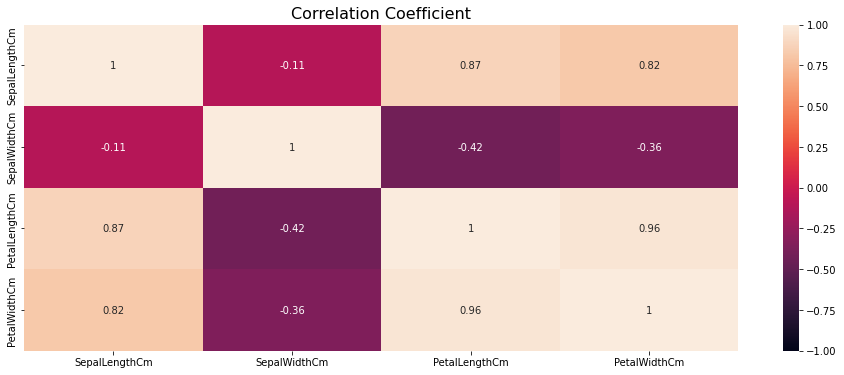

In [10]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Coefficient', size=16)

* Observe, all the diagonal have value as 1 because the feature will have perfect positive correlation with itself.
* As this is classification problem, there is no chance to find the correlation of features with target feature but we can find the possibility of multicollinearity.
* Considering the threshold of +/-90, petal length and petal width are highly correlated.

# Count Plot
---

As this is a classification problem, It is necessary to check whether ot not the target feature is skewed i.e. imbalanced. If it is imbalanced, we can opt of either of the ways,

1. Random oversampling the least frequent class or random undersampling the most frequent class. Random oversampling is nothing but duplicating the observation in least frequent class to match the frequency of most frequent class. Vice-versa for undersampling. 

2. Creating synthetic data using techniques such as SMOTE.

It is important to understand that the techniques mentioned above is applied only on training dataset. Else, it would add bais in the result.

Text(0.5, 1.0, 'Count plot of Species')

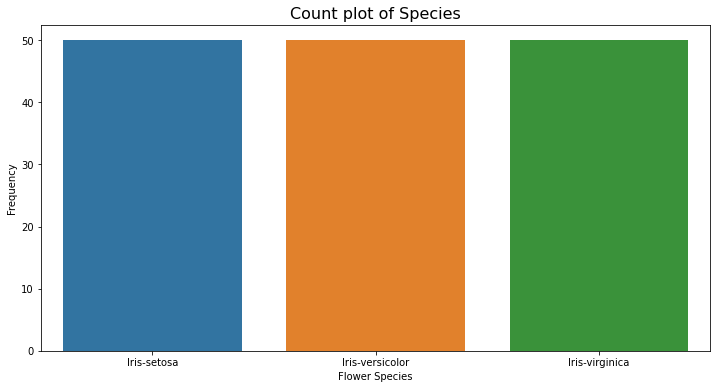

In [11]:
#checking class skewness
plt.figure(figsize=(12, 6))
sns.countplot(x='Species', data=data)
plt.xlabel('Flower Species')
plt.ylabel('Frequency')
plt.title('Count plot of Species', size=16)

* As depicted in the above plot, there is no imbalance\skewness in target variable. So, we dont need any techniques to balance data.

# BoxPlots
---
It gives five peices of impomation namely,
1. Minimum score,
2. First Quartile,
3. Median,
4. Third Quartile, and
5. Maximum Score.

Interquartile range can be computed as, IQR = Q3-Q1

1. Minimum point = first quartile - 1.5*IQR
2. Maximum point = third quartile + 1.5*IQR

**Note:** Any point less than minimum and more than maximum is an outlier


Interpretation from shape of box
1. Longer box means more spread and more variance
2. Shorter box means less spread and less variance


Skewness interpretation

1. If the longer part of the box is situated below the median means that the data is skewed to the left
2. If it’s above, then the data is skewed to the right. 


Text(0.5, 1.0, 'Boxplot of Features')

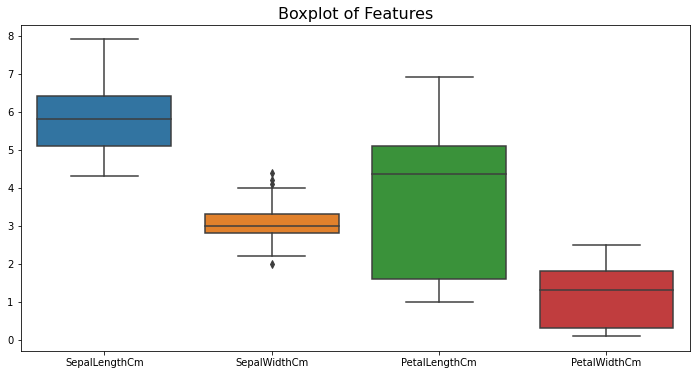

In [12]:
#boxplot of predictors
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Features', size=16)

* From positioning of boxplots, it can be interpreted that Petal width has minimum values and sepal length has highest values.
* From shape of boxplot, the petal length has highest spread i.e. most variance and the sepal width has lest spread i.e. least variance.
* In terms of skewness,

1. Sepal length and sepal width are approximately normal distribution as the median line is in middle.
2. Petal length and petal width are left-skewed as the majority part of the box is below the median.

* There are outliers in the Sepal width above 4 and below 2.2

# Q-Q Plot (Quantile-Quantile Plot)
---


**Motive 1:** It is to understand the distribution of the sample. The ordered sample is plotted on x axis and the theoretical standard normal distribution (mean 0 and sd as 1 so the values are ....-3,-2,-1,0,1,2,3....) on the y axis. If the points fall on the line then it is a normal distribution.

**Motive 2:** It is also used to compare the distribution of two samples. If both have same distribution, then there points will fall on the same line else not.

It also describes the skewness when plotted against the standard normal distribution. If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution is left-skewed (or negatively skewed) but when we see the upper end of the Q-Q plot to deviate from the straight line and the lower and follows a straight line then it is right-skewed (or positively skewed).


Similarly, we can talk about the Kurtosis (a measure of “Tailedness”) of the distribution by simply looking at its Q-Q plot. The distribution with a fat tail will have both the ends of the Q-Q plot to deviate from the straight line and its center follows a straight line, whereas a thin-tailed distribution will form a Q-Q plot with a very less or negligible deviation at the ends thus making it a perfect fit for the Normal Distribution.



<Figure size 1152x432 with 0 Axes>

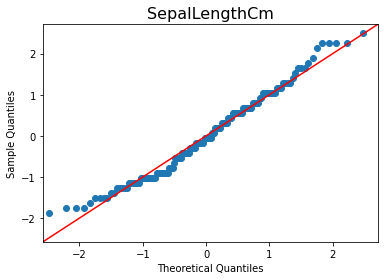

<Figure size 1152x432 with 0 Axes>

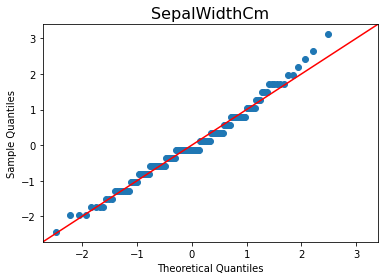

<Figure size 1152x432 with 0 Axes>

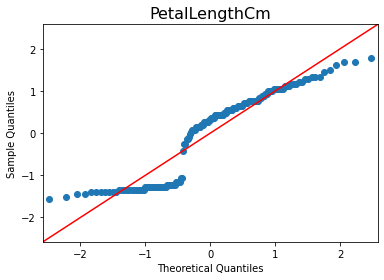

<Figure size 1152x432 with 0 Axes>

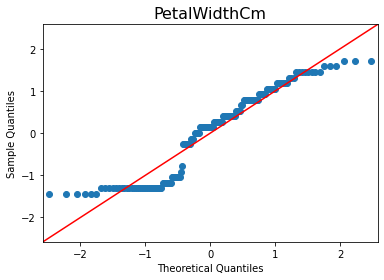

In [13]:
# normal qqplot against normal distribution
for col in data.columns:
    if col != 'Species':
        plt.figure(figsize=(16, 6))
        sm.qqplot(data[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()

* As depicted in above graphs, the sepal length and sepal width are almost on the diagonal line so they are normally distributed.
* While, the other two's distribution cannot be defined just from q-q plot as they are breaking in between.

# Violin Plot
---

It is combination of box plot and frequency distribution of the sample. The box plot is in between which shows 5 properties such as ,

1. Minimum score,
2. First Quartile,
3. Median,
4. Third Quartile, and
5. Maximum Score.

The frequency distribution shows the,
1. Wider part has highest probability
2. Narrow part has least probability

Three major elements terminology: peaks, valley and tails.
The frequency distribution is based on Kernel density estimation distribution. KDE is a non-parametric way to estimate the PDF of a random variable. It is a fundamental data smoothing problem where inferences about the population are made, based on finite data sample.

**Important:** KDE is a way to show the frequency of data just like histogram. Issue in histogram is that it depends on the bins and its size. If change in size/bins, shape changes. So, KDE is considered a good estimator of the distribution.

If two violin plots are overlapping, then they are difficult to classify. Overlapping here means that they share same lengths in scale. For example, the violin plot of length of three species are plotted. If two of them are overlapping in terms of sharing same length, then they are difficult to classify on the basis of length. But the third one can be classify than other two so length is a good feature.
For example, one of the violin plot is wider than other two while measuring versus width, then the leafs with good width belongs to that class.



Text(0.5, 1.0, 'Violin Plot')

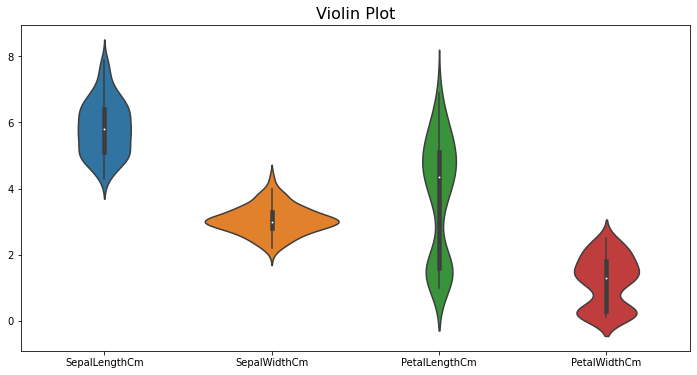

In [14]:
#generic violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=data)
plt.title('Violin Plot', size=16)

* The valleys are observed in petal length and petal width as there is gap of observation in between.
* The petal length observes a wide range in values from below 0 to 8.
* In sepal width and sepal length, majority of the values are close to the median.

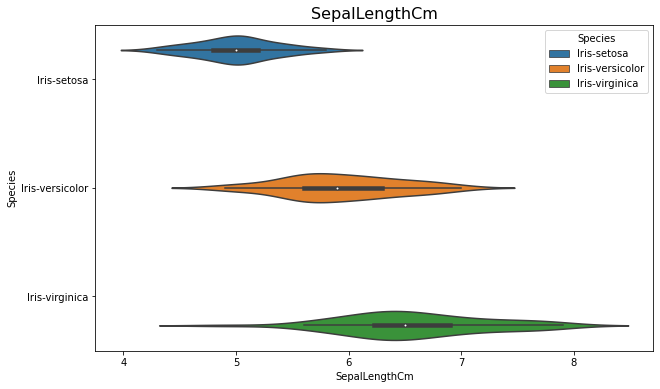

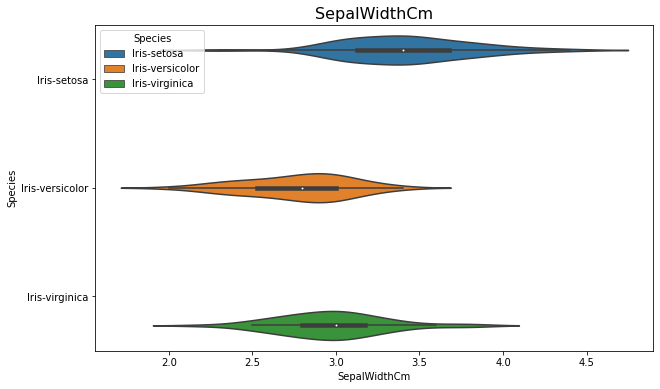

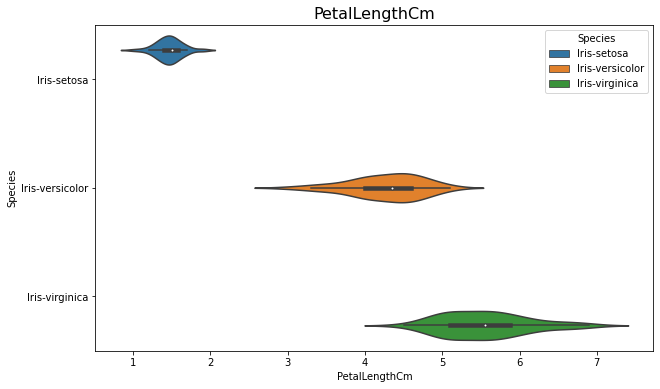

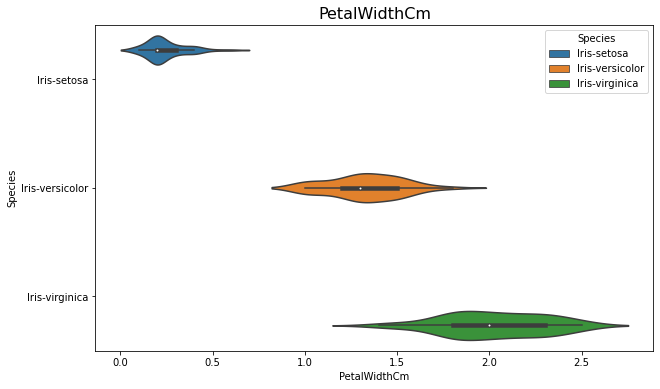

In [15]:
#violin plot against target variable "Species"
for col in data.columns:
    if col != 'Species':
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=data[col], y ='Species', hue='Species', data=data)
        plt.title(col, size=16)
        plt.show()

* For setosa, length and width of petal is significantly less as compared to other two violin plots.
* The petal width and length of virginica is maximum as compared to other two species.
* The sepal width of setosa covers a wide range but the length is small as compared to other two species.

# Swarm Plot
---

It works for continuous and categorical variable. It is a type of scatter plot but scatter plot has the issue of overlapping which is removed here. It gives insights about the distribution of the data. Drawback is that they work for small set of data. In large sets, getting insights from swarm plot will be difficult. Also, they don't show statistics like median, quartiles, etc. like box plot and violin plot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot')

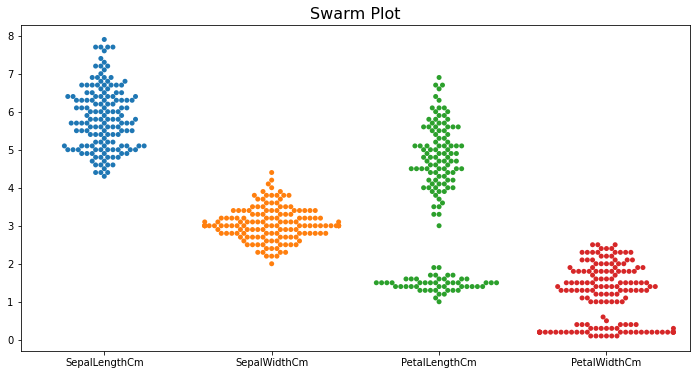

In [16]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data)
plt.title('Swarm Plot', size=16)

# Data Modeling

In [17]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
y = data['Species']
x = data.drop('Species', axis=1)

encoder = OrdinalEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1, 1))


from sklearn.model_selection import train_test_split, GridSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1234)

# HyperParameter Tuning

In [18]:
def compute_model(model_obj, params, cv=3):
    grid_model = GridSearchCV(model_obj, params, cv=cv)
    grid_model.fit(xtrain, ytrain)
    
    ypred_train = grid_model.best_estimator_.predict(xtrain)
    #ypred_train = model.predict(xtrain)

    from sklearn.metrics import accuracy_score
    train_accuracy = accuracy_score(ytrain, ypred_train)
    

    ypred = grid_model.best_estimator_.predict(xtest)
    #ypred = model.predict(xtest)
    test_accuracy = accuracy_score(ytest, ypred)
    return model_obj, train_accuracy, test_accuracy, grid_model.best_estimator_

In [19]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_param_grid = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.1, 0.001, 0.01, 0.2, 0.05], 'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200]}
gb_model = GradientBoostingClassifier()

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200], 'max_depth': [1, 2, 3, 4,5]}
rf_model = RandomForestClassifier()

#Adaboosting classifier
from sklearn.ensemble import AdaBoostClassifier
ab_param_grid = {'learning_rate': [0.1, 0.001, 0.01, 0.2, 0.05], 'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200]}
ab_model = AdaBoostClassifier()

#Extreme Gradient boost classifier
from xgboost import XGBClassifier
xg_param_grid = {'learning_rate': [0.1, 0.001, 0.01, 0.2, 0.05], 'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200, 250, 300], 'max_depth': [1, 2, 3, 4, 5, 6]}
xg_model = XGBClassifier()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
dt_model = DecisionTreeClassifier()

#SVM
from sklearn.svm import SVC
sv_param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.001, 1, 2, 3], 'kernel': ['linear', 'rbf', 'poly']}
sv_model = SVC()

In [20]:
import warnings
warnings.simplefilter("ignore")


all_models = {lr_model: {}, gb_model: gb_param_grid, rf_model: rf_param_grid, ab_model:ab_param_grid, xg_model: xg_param_grid, dt_model: dt_param_grid, sv_model: sv_param_grid}
model_results = list()

#implementing each model with probable parameters
for model_obj, params in all_models.items():
    model_obj, train_accuracy, test_accuracy, best_estimator = compute_model(model_obj, params, cv=3)
    model_results.append([model_obj, train_accuracy, test_accuracy, best_estimator])
    print(model_obj, train_accuracy, test_accuracy)


LogisticRegression() 0.9777777777777777 1.0
GradientBoostingClassifier() 1.0 1.0
RandomForestClassifier() 0.9703703703703703 1.0
AdaBoostClassifier() 0.9555555555555556 1.0
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) 0.9703703703703703 1.0
DecisionTreeClassifier() 0.9703703703703703 1.0
SVC() 0.9777777

**Plotting the Training and Testing Accuracy of the Model**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'LogisticRegression()'),
  Text(1, 0, 'GradientBoostingClassifier()'),
  Text(2, 0, 'RandomForestClassifier()'),
  Text(3, 0, 'AdaBoostClassifier()'),
  Text(4, 0, 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, gamma=None,\n              gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n              max_leaves=None, min_child_weight=None, missing=nan,\n              monotone_constraints=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, predictor=None, random_state=None,\n              reg_alpha=None, reg_lambda=None, ...)'),
  Text(5, 0, 'DecisionTreeClassifier(

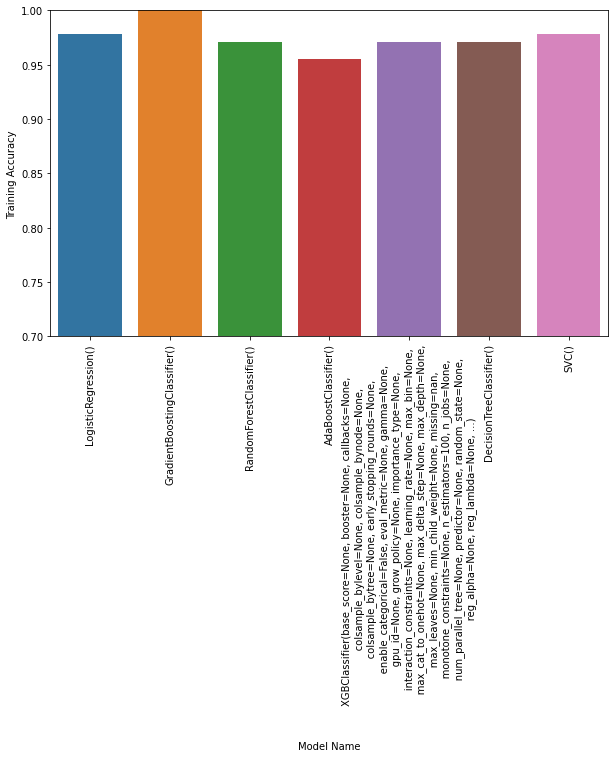

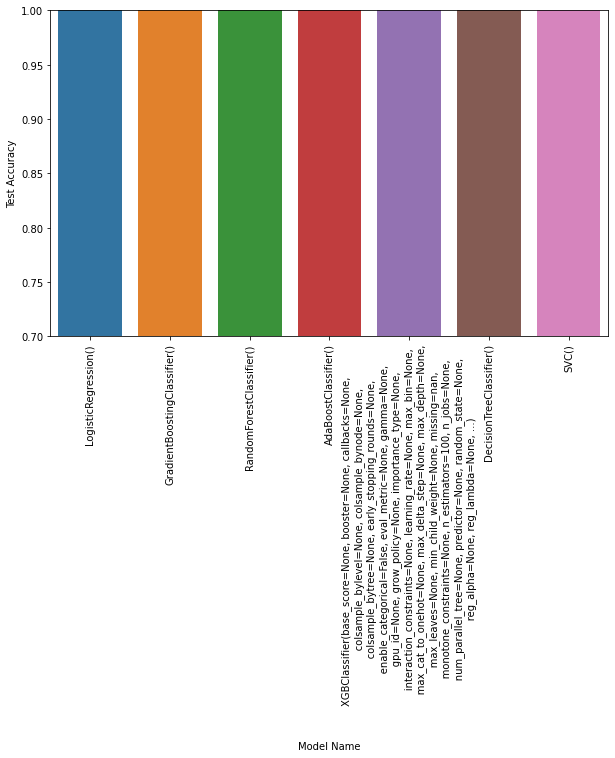

In [21]:
results = pd.DataFrame(model_results, columns = ['Model Name', 'Training Accuracy', 'Test Accuracy', 'Best Parameters'])
plt.figure(figsize=(10, 6))
sns.barplot(x = results['Model Name'].astype('category'), y = results['Training Accuracy'])
plt.ylim(0.7, 1.0)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 6))
sns.barplot(x = results['Model Name'].astype('category'), y = results['Test Accuracy'])
plt.ylim(0.7, 1.0)
plt.xticks(rotation=90)
